# Breast Cancer Project with Tensorflow

In [13]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("breast-cancer.csv")

In [15]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
df["diagnosis"] = [1 if i.strip()=="M" else 0 for i in df.diagnosis]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df.corr()["diagnosis"].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='diagnosis', ylabel='count'>

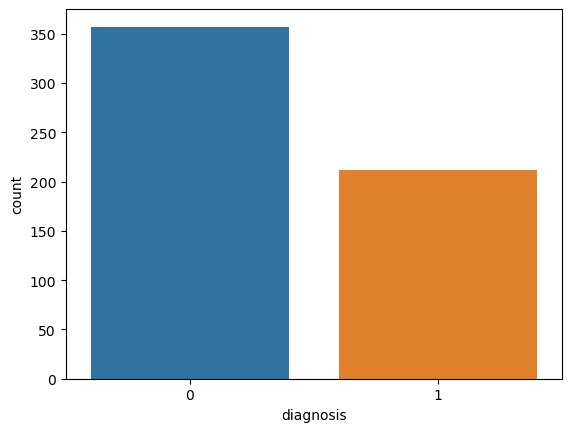

In [24]:
sns.countplot(x="diagnosis", data=df)

<Axes: >

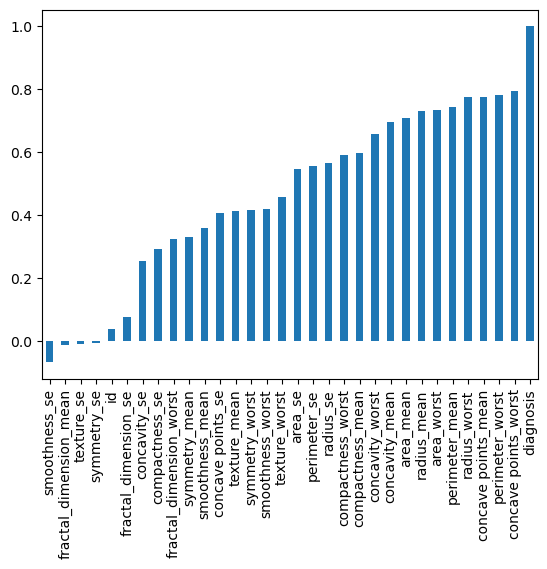

In [25]:
df.corr()["diagnosis"].sort_values().plot(kind="bar")

In [26]:
y = df["diagnosis"].values
x = df.drop("diagnosis",axis=1).values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,
                                                    random_state=15)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
scaler.fit(x_train)

MinMaxScaler()

In [31]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Tensorflow Application

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
x_train.shape

(398, 31)

In [46]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [47]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(398, 31) (398,)
(171, 31) (171,)


In [48]:
model.fit(x=x_train, y=y_train, epochs=300,
          validation_data=(x_test,y_test), verbose=1)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.7115 - val_loss: 0.6837
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6727 - val_loss: 0.6569
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6347 - val_loss: 0.6250
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6090 - val_loss: 0.5877
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5673 - val_loss: 0.5403
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4970 - val_loss: 0.4770
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4414 - val_loss: 0.4012
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3746 - val_loss: 0.3282
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2977 - val_loss: 0.2721
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2310 - val_loss: 0.2314
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1779 - val_loss: 0.2044
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [49]:
loss_val = pd.DataFrame(model.history.history)

<Axes: >

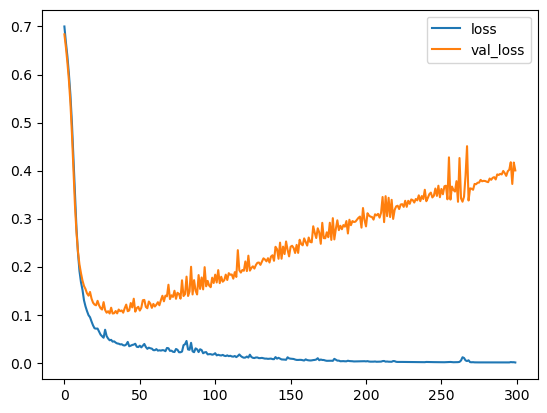

In [50]:
loss_val.plot() # OVERFITTING

# Early Stop Usage

In [51]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [52]:
earlyStop = EarlyStopping(monitor="val_loss",mode="min",verbose=1, 
                          patience=25)

In [53]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),
          verbose=1,callbacks=[earlyStop])

Epoch 1/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.6815 - val_loss: 0.6544
Epoch 2/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6428 - val_loss: 0.6252
Epoch 3/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6140 - val_loss: 0.5903
Epoch 4/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5734 - val_loss: 0.5501
Epoch 5/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5392 - val_loss: 0.5034
Epoch 6/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4781 - val_loss: 0.4524
Epoch 7/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4320 - val_loss: 0.3932
Epoch 8/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3733 - val_loss: 0.3349
Epoch 9/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3031 - val_loss: 0.2856
Epoch 10/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2734 - val_loss: 0.2524
Epoch 11/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2184 - val_loss: 0.2207
Epoch 12/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

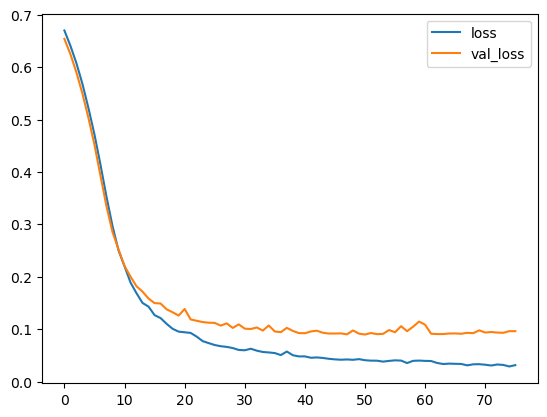

In [54]:
Loss_with_Early_Stop = pd.DataFrame(model.history.history)
Loss_with_Early_Stop.plot()

# Dropout Usage

In [84]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer="adam", loss="binary_crossentropy", 
              metrics=["accuracy"])


In [85]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),
          verbose=1,callbacks=[earlyStop])

Epoch 1/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4542 - loss: 0.7456 - val_accuracy: 0.7076 - val_loss: 0.6851
Epoch 2/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5158 - loss: 0.7049 - val_accuracy: 0.8596 - val_loss: 0.6824
Epoch 3/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5578 - loss: 0.7030 - val_accuracy: 0.6784 - val_loss: 0.6775
Epoch 4/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6220 - loss: 0.6718 - val_accuracy: 0.7193 - val_loss: 0.6704
Epoch 5/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6445 - loss: 0.6770 - val_accuracy: 0.7251 - val_loss: 0.6616
Epoch 6/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5747 - loss: 0.6879 - val_accuracy: 0.6608 - val_loss: 0.6569
Epoch 7/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6525 - loss: 0.6649 - val_accuracy: 0.6550 - val_loss: 0.6521
Epoch 8/700
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6781 - loss: 0.6587 - val_accuracy: 0.6784 - 

Text(0, 0.5, 'Loss')

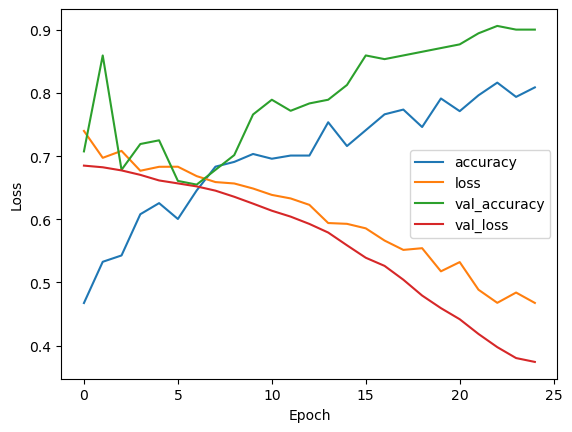

In [86]:
loss_data = pd.DataFrame(model.history.history)
loss_data.plot()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [87]:
predictions = model.predict(x_test)  
# Use predict() instead of predict_classes

# Convert the probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       108
           1       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



In [90]:
print(confusion_matrix(y_test,predicted_classes))

[[108   0]
 [ 63   0]]
